In [2]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import math
import numpy as np


Using TensorFlow backend.


In [3]:
(X_train,_),(_,_)=mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
print(X_train.shape)
print(type(X_train))

X_train = X_train.reshape((*X_train.shape,1))
print(X_train.shape)

(60000, 28, 28)
<class 'numpy.ndarray'>
(60000, 28, 28, 1)


In [5]:
X_train = (X_train.astype('float32')-127.5)/127.5
print(np.min(X_train))
print(np.max(X_train))

-1.0
1.0


In [0]:
Total_epochs = 50
Batch_size = 256
no_of_batches = int(X_train.shape[0]/Batch_size)
Half_batch=128

#Basically in each epoch 128 fake and 128 real images will be given to the discriminator to discriminate.
Noise_dim=100 # we will upsample it to 784
adam= Adam(lr=2e-4,beta_1=0.5)

In [13]:
#Generator
generator = Sequential()
generator.add(Dense(7*7*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

#Now double the activation size to 14*14*64
generator.add(UpSampling2D())
generator.add(Conv2D(64,kernel_size=(5,5),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

#Now make it to 28*28*1
generator.add(UpSampling2D())
generator.add(Conv2D(1,kernel_size=(5,5),padding='same',activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer='adam')
generator.summary()

#Train the discriminator network
discriminator  = Sequential()
discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))

#Next conv layer (14 x 14 x 64) ---> 7 x 7 x 128
discriminator.add(Conv2D(128,(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))

#Flatten
discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')
discriminator.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)       

In [14]:
!mkdir images
!mkdir models
! ls

mkdir: cannot create directory ‘images’: File exists
mkdir: cannot create directory ‘models’: File exists
images	model  models  sample_data


In [15]:
!mkdir model


mkdir: cannot create directory ‘model’: File exists


In [0]:
def save_images(epoch,samples=100):
  noise = np.random.normal(0,1,size=(samples,Noise_dim))
  generated_imgs=generator.predict(noise)
  generated_imgs=generated_imgs.reshape(samples,28,28)
  
  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
    plt.axis('off')
    
  plt.tight_layout()
  plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
  plt.show()

In [0]:
#Gan
discriminator.trainable = False
gan_input = Input(shape=(Noise_dim,))
generated_image=generator(gan_input)
gan_output=discriminator(generated_image)

#Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 Disc loss 0.5766 Generator loss 2.1417


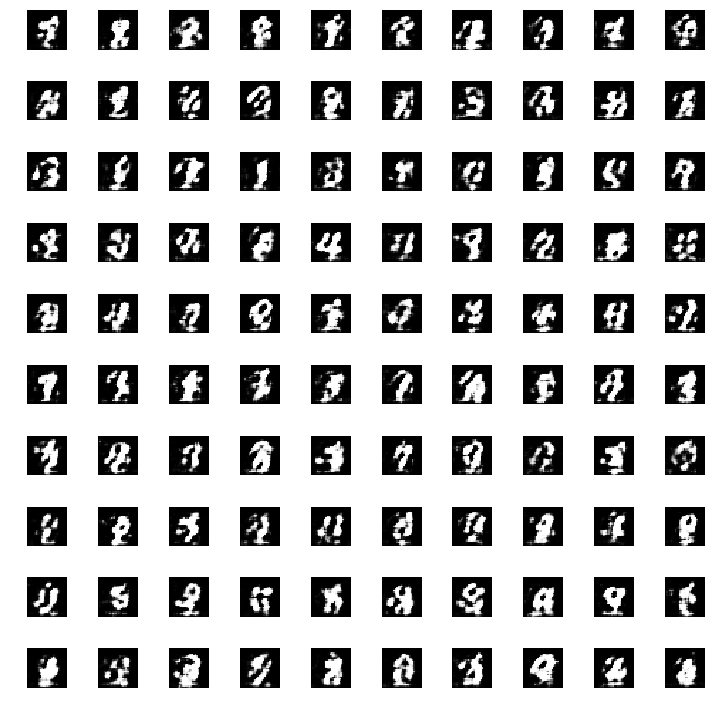

Epoch 2 Disc loss 0.6855 Generator loss 1.0727
Epoch 3 Disc loss 0.6197 Generator loss 1.1627
Epoch 4 Disc loss 0.6151 Generator loss 1.2861
Epoch 5 Disc loss 0.6522 Generator loss 1.1374
Epoch 6 Disc loss 0.6511 Generator loss 1.0525


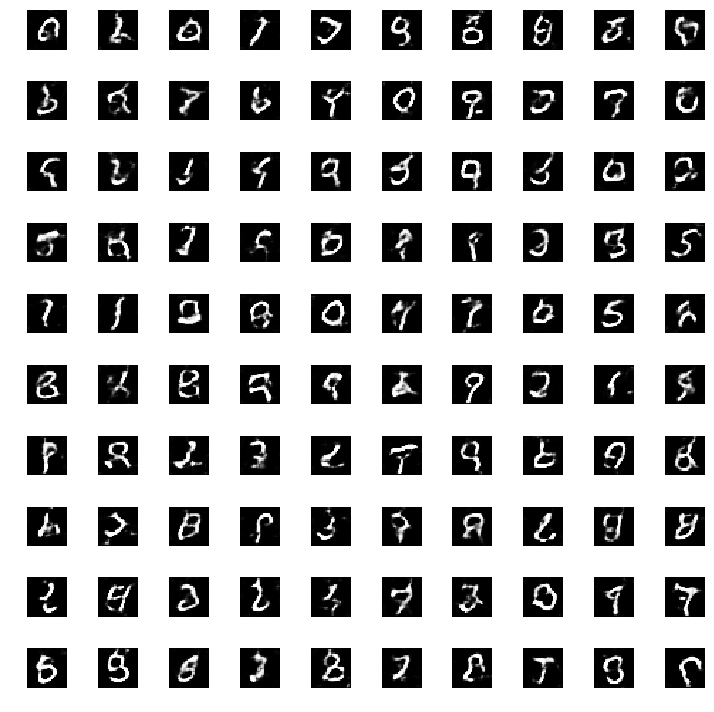

Epoch 7 Disc loss 0.6523 Generator loss 1.0161
Epoch 8 Disc loss 0.6505 Generator loss 1.0193
Epoch 9 Disc loss 0.6479 Generator loss 1.0251
Epoch 10 Disc loss 0.6510 Generator loss 1.0473
Epoch 11 Disc loss 0.6457 Generator loss 1.0439


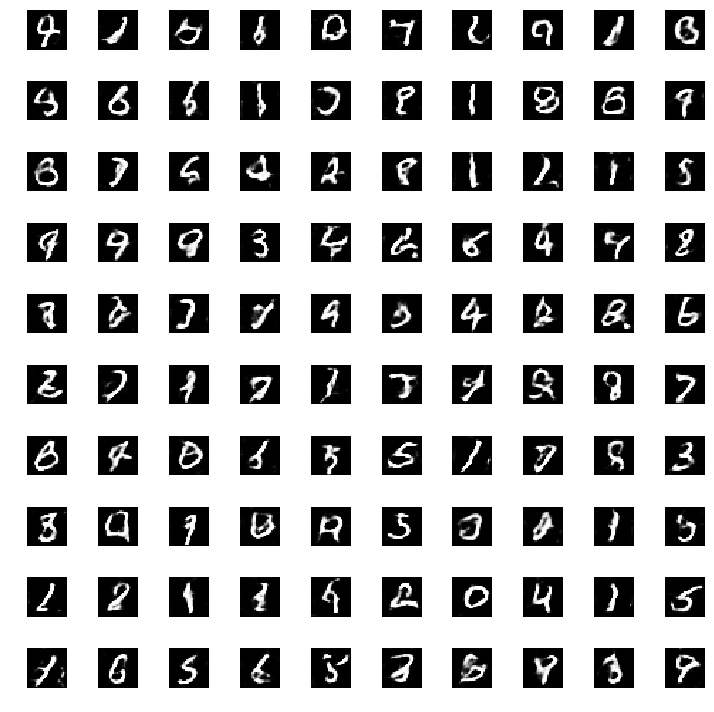

Epoch 12 Disc loss 0.6460 Generator loss 1.0637
Epoch 13 Disc loss 0.6452 Generator loss 1.0714
Epoch 14 Disc loss 0.6473 Generator loss 1.0860
Epoch 15 Disc loss 0.6416 Generator loss 1.0918
Epoch 16 Disc loss 0.6455 Generator loss 1.0930


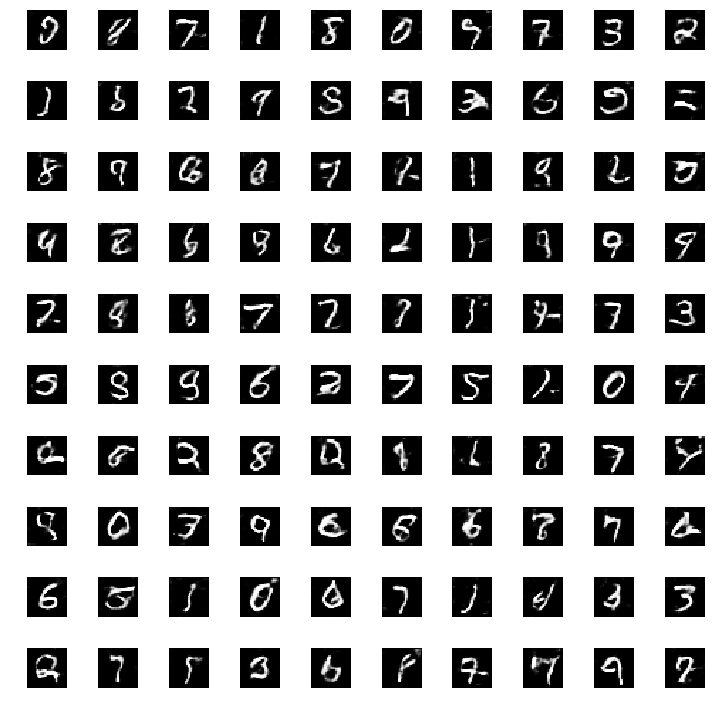

Epoch 17 Disc loss 0.6349 Generator loss 1.1116
Epoch 18 Disc loss 0.6305 Generator loss 1.1308
Epoch 19 Disc loss 0.6253 Generator loss 1.1333
Epoch 20 Disc loss 0.6225 Generator loss 1.1526
Epoch 21 Disc loss 0.6179 Generator loss 1.1768


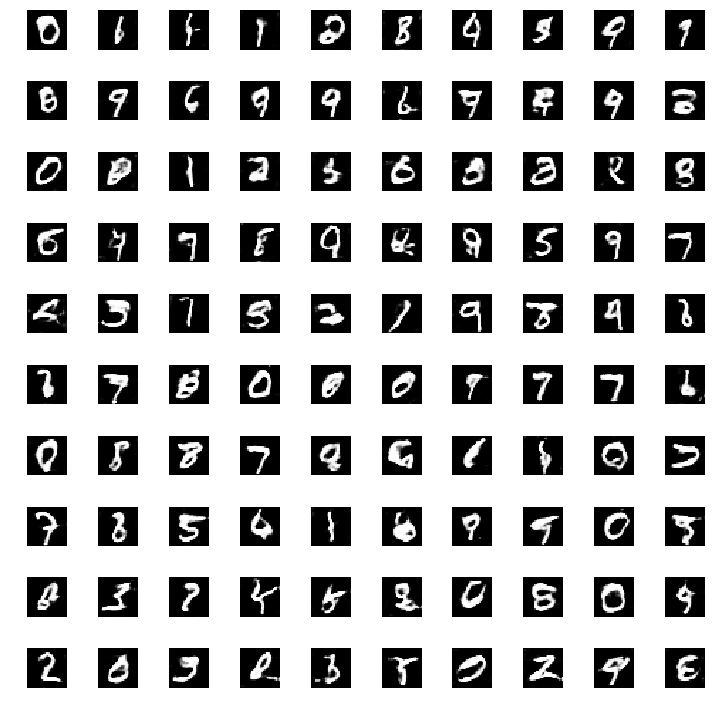

Epoch 22 Disc loss 0.6107 Generator loss 1.2035
Epoch 23 Disc loss 0.6033 Generator loss 1.2285
Epoch 24 Disc loss 0.5913 Generator loss 1.2470
Epoch 25 Disc loss 0.5875 Generator loss 1.3109
Epoch 26 Disc loss 0.5773 Generator loss 1.3166


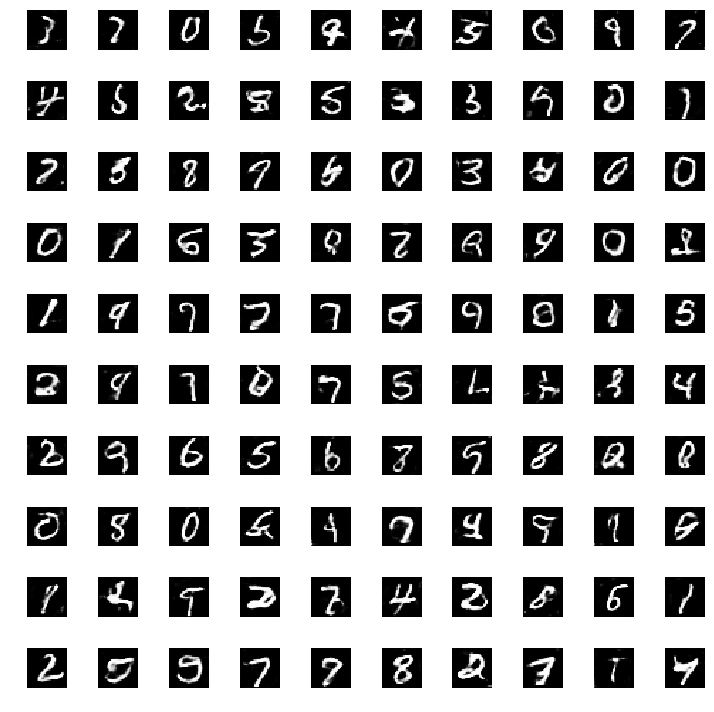

Epoch 27 Disc loss 0.5549 Generator loss 1.3703
Epoch 28 Disc loss 0.5672 Generator loss 1.3964
Epoch 29 Disc loss 0.5500 Generator loss 1.4321
Epoch 30 Disc loss 0.5435 Generator loss 1.4941
Epoch 31 Disc loss 0.5457 Generator loss 1.5155


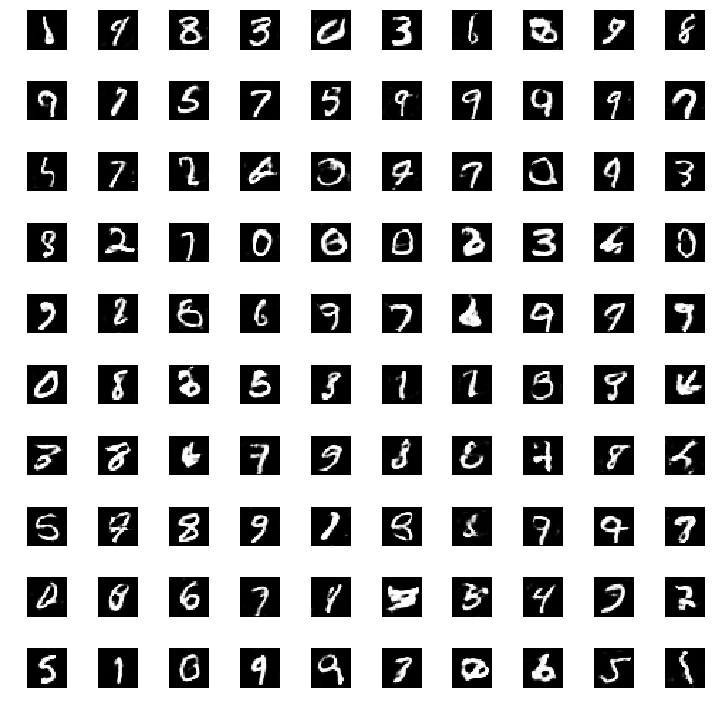

Epoch 32 Disc loss 0.5145 Generator loss 1.5478
Epoch 33 Disc loss 0.5326 Generator loss 1.6413
Epoch 34 Disc loss 0.5072 Generator loss 1.6091
Epoch 35 Disc loss 0.5140 Generator loss 1.6844
Epoch 36 Disc loss 0.5077 Generator loss 1.7011


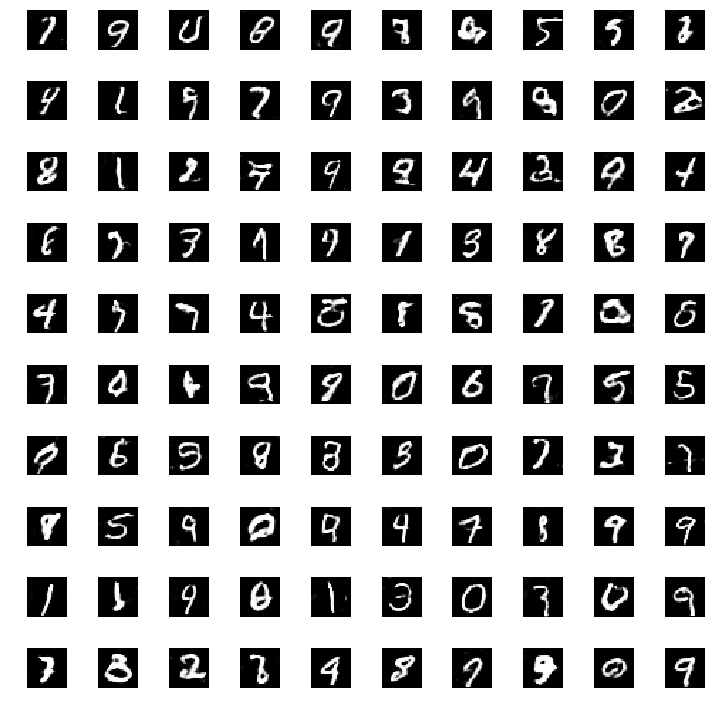

Epoch 37 Disc loss 0.4939 Generator loss 1.7475
Epoch 38 Disc loss 0.4897 Generator loss 1.8010
Epoch 39 Disc loss 0.4902 Generator loss 1.8255
Epoch 40 Disc loss 0.4727 Generator loss 1.8531
Epoch 41 Disc loss 0.4771 Generator loss 1.9194


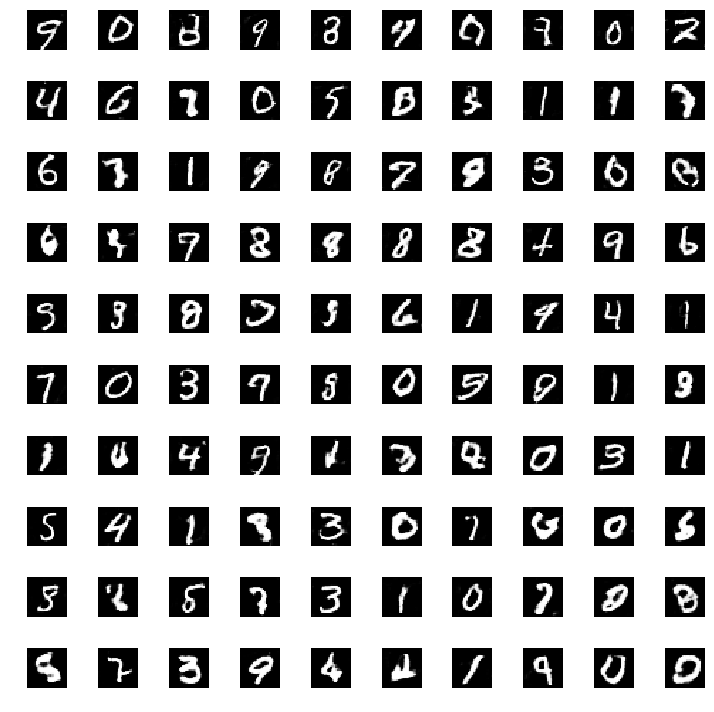

Epoch 42 Disc loss 0.4701 Generator loss 1.9129
Epoch 43 Disc loss 0.4684 Generator loss 1.9558
Epoch 44 Disc loss 0.4615 Generator loss 1.9955
Epoch 45 Disc loss 0.4595 Generator loss 2.0296
Epoch 46 Disc loss 0.4565 Generator loss 2.0707


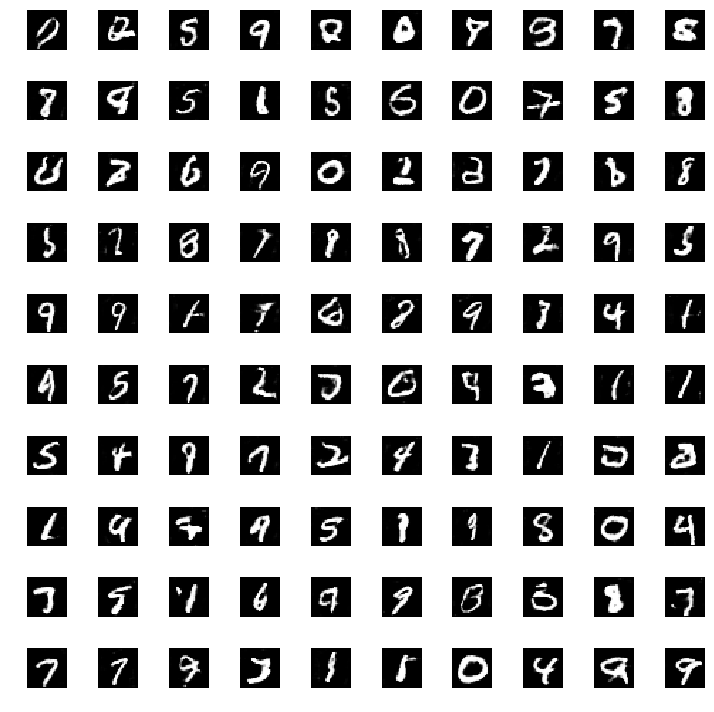

Epoch 47 Disc loss 0.4604 Generator loss 2.0877
Epoch 48 Disc loss 0.4491 Generator loss 2.0988
Epoch 49 Disc loss 0.4449 Generator loss 2.1335
Epoch 50 Disc loss 0.4429 Generator loss 2.1598


In [19]:
#Training loop
d_losses=[]
g_losses=[]

for epoch in range(Total_epochs):
  epoch_d_loss=0
  epoch_g_loss=0
  
  #Mini batch SGD
  for step in range(no_of_batches):
    #Step 1 is to train the discriminator
    #It has 50% real and 50% fake data
    idx = np.random.randint(0,X_train.shape[0],Half_batch)
    #This is random indices from the training data. 0 to 60000 with each idx of 128.128 is the number of images.
    #idx will be a list
    real_images=X_train[idx]
    
    #now fake data
    noise = np.random.normal(0,1,size=(Half_batch,Noise_dim))
    fake_images=generator.predict(noise) #Forward prop. This passes the noise vector through the generator and it generates fake images.
    
    #Now we should also assign labels to the data for discriminator to discriminate.
    real_y = np.ones((Half_batch,1))*0.9
    # this is one sided smoothing. multiplying each 1 by 0.9
    fake_y = np.zeros((Half_batch,1))
    
    #Train the discriminator
    d_loss_real  = discriminator.train_on_batch(real_images,real_y)
    d_loss_fake = discriminator.train_on_batch(fake_images,fake_y)
    d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
    
    epoch_d_loss += d_loss
    
    #Train the generator considering the discriminator is frozen.
    noise = np.random.normal(0,1,size=(Batch_size,Noise_dim))
    # we want the ground truth to be 1 as the generator wants to generate images that the discriminator thinks is real.
    ground_truth_y = np.ones((Batch_size,1))
    g_loss = model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss += g_loss
    
    #This completes the training
    
  print("Epoch %d Disc loss %.4f Generator loss %.4f"%((epoch+1),epoch_d_loss/no_of_batches,epoch_g_loss/no_of_batches))
  d_losses.append(epoch_d_loss/no_of_batches)
  g_losses.append(epoch_g_loss/no_of_batches)
  if (epoch%5==0):
    generator.save('model/gan_generator_{0}.h5'.format(epoch+1))
    save_images(epoch)
    